# Midterm CS4414/9637/9114
# Student ID: XXXXXXXXX <font color = 'red'> (XX / 100) </font>

## General comments 
This Midterm integrates knowledge and skills acquired in the first half of the semester, especially in the 5 Assignments. You are allowed to use any document and source on your computer and look up documents on the internet. **You or not allowed to share documents, or communicate in any other way with people inside or outside the classroom during the midterm.** To finish the midterm in the alloted 2 hrs, you will have to work efficiently. **Read the entirety of each question carefully.**
You need to submit the midterm by the due date (16:20) on OWL under Assignments/Midterm. Late submission will be scored with 0 pts, unless you have received extra accommadation. So please start submission 5 min before the end!  

### Additional Guidance

If at any point you are asking yourself "are we supposed to...", then *write your assumptions clearly in your exam and proceed according to those assumptions.*

Good luck!

In [72]:
## Preliminaries
# Sets up the environment by importing 
# pandas, numpy, matplotlib, and statsmodels.

### YOU MAY ADD ADDITIONAL IMPORTS IF YOU WISH

import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as ss
import scipy.optimize as so
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.linear_model import Ridge
import statsmodels.formula.api as smf

import sklearn as sk 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

---
## Data set 
The Child Health and Development Studies investigate a range of topics. One study considered all pregnancies between 1960 and 1967 among women in the Kaiser Foundation Health Plan in the San Francisco East Bay area.

The data frame contains the following data, where each row represents a baby:

- bwt: birth weight (ounces)
- gestation: length of pregnancy (days)
- parity: 0 if mom's first baby, 1 if not mom's first baby
- age: mom's age (years)
- height: mom's height (inches)
- weight: mom's weight (pounds)
- smoke: 0 if mom is nonsmoker, 1 if mom is smoker

Note that babies that are born with a gestation of less than 37 weeks (259 days) are considered pre-term. The survival rate of babies born before week 22 (154 days) is only 6%.

Overall this midterm will focus on building a good predictive model for the **birth weight** of a baby. This is because low birthweight is a strong risk factor for various developement delays and disorders.

In [2]:
# Load the data set and drop the case number, as well as any Missing observations: 
df = pd.read_csv('babies.csv').drop('case',axis='columns').dropna()

---
---
## Task 1: Choosing a training loss function (35pt)

---
### Question 1.1 - Warm up (X / 2 pt)
Written answer: report the number of observations and the number of variables that you have in the data set. 

In [7]:
print("We have ", df.shape[0], " observations and " ,df.shape[1] , " variables")

We have  1174  observations and  7  variables


### Question 1.2 - visualization (X / 5pt)
Generate a plot that visualizes the joint distribution of gestation and birth weight. Also display plots that show the marginal distributions of gestation and birth weight seperately.  

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


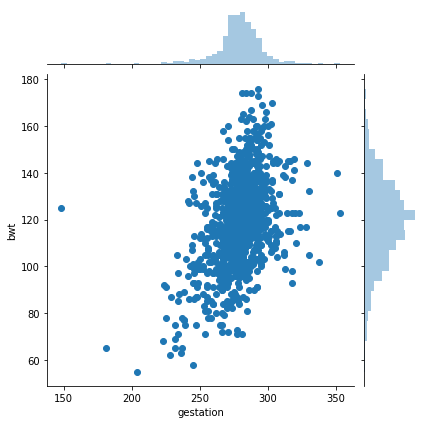

In [14]:
sns.jointplot(df.gestation, df.bwt)

---
### Question 1.3 - Outliers (X / 5pt)
Written answer: Based on the plot that shows the joint distribution of birth weight and gestation, check for ourliers in the data set. Are there unusual observations in the data set? Would you include or exclude them in the analysis? Please justify your answer. 

*Please note that independent of your answer, we will actually not remove any observation from the data set for further analysis*

Written answer: I see a few outliers in this data set. One noteable observations that stands on on the graph is the far left observation where the baby has the single lowest gestations but an above average birthweight/

---
### Question 1.4 - Different training losses (X/13pt)
We now want to build a good predictive model for birth weight, based on a 3-rd order polynomial expansion on gestation. To do so, we first want to decide whether to build a model using a squared error training loss function, or an absolute deviation training loss function. To do so, take the following steps: 

* reserve 300 data points as a test set (random_state = 0)
* define a model with a 3rd order polynomial expansion of gestation (including linear, quadratic and cubic term) 
* fit the model (including intercept) using the squared error as training loss
* fit the model (including intercept) using the mean absolute deviation as training loss 
* generate a scatter plot of gestation (x-axis) and birthweight (y-axis) for the trainingg data and superimpose the fit of the two fitted models 

In [77]:

# reserve 300 data points as a test set (random_state = 0)
y = df.bwt
X = df.drop('bwt', axis = 'columns')
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size = 300, 
                                                random_state = 0)


model_pipeline = Pipeline([ ('poly', PolynomialFeatures(degree=3, include_bias=False)), 
                           ('linear_reg', LinearRegression(fit_intercept=True))])


poly_step = model_pipeline.named_steps['poly']
transformed_X = poly_step.fit_transform(Xtrain)

cv_scores = cross_val_score(model_pipeline, 
                            Xtrain, 
                            ytrain ,
                            cv=10,
                            scoring=make_scorer(mean_absolute_error))
meancv=cv_scores.mean()
print(meancv) 
    

cv_scores_2 = cross_val_score(model_pipeline, 
                            Xtrain, 
                            ytrain ,
                            cv=10,
                            scoring=make_scorer(mean_squared_error))
meancv_2=cv_scores_2.mean()


print(meancv_2)

#ax=sns.scatterplot(x=df_test.ht,y=df_test.wt)
#ax.set_xlabel('Height')
#ax.set_ylabel('Weight')
#plt.plot (Model1)
#plt.plot (Model2)

12.876054584725278
281.84484765239296


---
### Question 1.5 - Test error (X / 7pt)

Report the performance of *both fitted models* from Question 1.4 on the test set, using the mean absolute error as the test loss. Also report the 95% confidence interval of mean absolute error (the test loss) of each model. 


In [78]:
# At current time I can't get the above working, so I will demonstrate how I would approach this problem

# Report performance
print("Mean CV Error of MSE Model: ", meancv_2)
print("Confidence Intervals: ", np.quantile(cv_scores_2, [0.025, 0.975]))
print("")

print("Mean CV Error of MAE Model: ", meancv)
print("Confidence Intervals: ", np.quantile(cv_scores, [0.025, 0.975]))


Mean CV Error of MSE Model:  281.84484765239296
Confidence Intervals:  [221.68365185 336.09703695]

Mean CV Error of MAE Model:  12.876054584725278
Confidence Intervals:  [11.38977512 13.77261347]


---
### Question 1.6 Interpreting differences in test error (X / 3pt)
Written answer: Based on these numbers, which training loss would you choose? Does the data provide a strong argument for for using one of these training loss functions? Justify you answer.  

Written answer: I would choose the model that brings the least error. This happens to be the one with the loss function of Mean Absolute Error.

---
---
## Task 2: Selecting more features for a better model (30pt)

---
### Question 2.1 - Selecting features using forward search (23pt)

For Task 2, use the same data, and training / test split as in task 1, and use the mean squared error as the training loss function. *Just using the training data*, please select what variables that you want to include in the model (over and above gestation) to make the best possible prediction for the test data. 
Start with a model that uses the a 3-rd order polynomial expansion on gestation as a base model. Then decide - using forward search - whether to include **age** and/or **smoke** as a variable into the model. Show all the steps of your forward seearch and justify which models you are trying. Note that you could also decide that it's best not to include any new variables.  

Written answer: Decide whether to use the (mean squared) training error or the (mean squared) validation error (obtained using 5-fold crossvalidation) to select the best model. Justify why you are using which.

Finally report the best model. 

Written answer:

In [ ]:
#Code answer:

---
### Question 2.2 Describe your model selection procedure (X / 7pt)
Written answer: describe the procedure you used in 2.1, as you would in a method section of a research paper. Note: you do not need to describe specific function, but do not assume that the reader exactly knows what forward search is. You will need to give the reader sufficient information, so he/she could replicate your results.  

---
---
## Task 3: Regularized models  (35pt)
We are now fitting and evaluting a regularized model. To get a better evaluation, we will this time use a test set of size 1000. 

In [58]:
Dtrain,Dtest = train_test_split(df,test_size=1000,random_state=0)

---
### Question 3.1: Building a complex model (X / 5pt)
For the training data, use the following polynomial features expansion to build a model to predict the birth weight (bwt):  

* gestation: 3rd order polynomial (as in Question 1.4)
* parity: 1st order polynomial
* age: 2nd order polynomial 
* height: 1st order polynomial  
* smoke: 1st order polynomial 
* smoke x age interaction 
* smoke x gestation interaction 

z-standardize your regressors. 

In [68]:
# This whole assignment threw me off, If i had the chance to do it all over again, I would have simply done everything with a design matrix.

# Use formula(?)
model_pipeline_2 = Pipeline([
    ('1st order', PolynomialFeatures(degree=1)),
    ('2nd order', PolynomialFeatures(degree=2)),
    ('Interaction', PolynomialFeatures(interaction_only=True))
])

results = smf.ols('bwt ~ gestation**3 +gestation**2 + gestation + age**2 + age + height + smoke + smoke*age + smoke*gestation', data=Dtrain)
# Didnt get the chance to figre out how to standardize

results

### Question 3.2- More complex? (X / 2 pt) 
Written answer: Would it make sense to include the 2nd order polynmial of smoke? Justify your answer. 


 Written answer: No since its a discrete yes or no variable. Squaring it is pointless.

### Question 3.3 - Training and testing error (X / 10pt)
Fit the model from 3.1 on the the training data using ridge regression with a regularization coefficient of $exp(-20)$. Evaluate the fit of the model using $R^2$ and also calculate the proportion of variance predicted on the test data. 
Then repeat the same steps, this time using a regularization coefficient of $exp(-1)$. Again report $R^2$ for training and test set.  

Written answer: How do training $R^2$ and test $R^2$ change? Why? 

In [ ]:


#Set alpha equal to the parameter which minimized cv score
ridge = Ridge(alpha=np.exp(−20))
ridge.fit(transformed_poly_X, ytrain)


yp = ridge.predict(poly_transformed_Xtest)

sqerr = (ytest-yp)**2 
ss = (ytest-ytest.mean())**2 
test_error = 1-sqerr.mean()/ss.mean() 
test_ci = test_error + 1.96 * np.std(sqerr) / np.sqrt(len(sqerr)) * np.array([-1, 1])
test_ci = 1-test_ci/ss.mean()
print("Mean variance predicted: ",test_error)
print("95% CI: ",test_ci)


print("Proportion variance predicted: ",1-test_error/ss.mean())

Written answer:

### Question 3.4 - Choosing a ridge coefficient (X / 10pt)
Based on the training set alone, use leave-one-out crossvalidation to determine the best value for the ridge coefficient. 
Vary the ridge coefficient from exp(-15) to exp(5) in 21 steps. Make a plot of the validation error against the log of the ridge coefficient. Which value for the ridge coefficient do you chose? 


Text(0.5, 0, '$\\log(\\lambda)$')

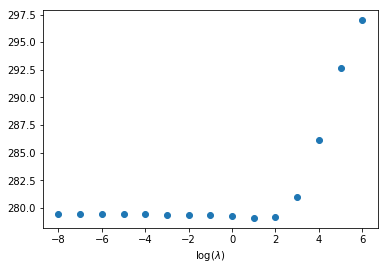

In [76]:

alpha = np.exp(np.linspace(-8,6,15))

y = Dtrain.bwt
X = Dtrain.drop('bwt', axis = 'columns')

scores =np.zeros_like(alpha)

for i,a in enumerate(alpha):
    ridge = Ridge(alpha=a)
    cv_score = cross_val_score(ridge,X, y, cv = X.shape[0], scoring = 'neg_mean_squared_error')
    scores[i] = -cv_score.mean()
    
plt.scatter(np.log(alpha), scores)
plt.xlabel(r'$\log(\lambda)$')

### Question 3.5 - A new regression method (X / 8pt)
Another researcher suggest to fit the data using a model in which the predicted values for y are:

$$ \hat{y} = exp(\beta^T \mathbf{x}_i)$$

Where $\mathbf{x}_i$ are the value for the indepenent variables for observation $i$.
The vector of regression coefficients $\beta$ is fitted by mimimzing the following objective function:  
$$ J = \sum_{i=1}^N\Bigg(-y_{i}\cdot \ln(\hat{y}_i) + \hat{y}_i + \ln(y_i!) \Bigg) + \frac{\lambda}{2} \|\beta\|^2_2.$$

Written answer: 
* What probabilistic model would justify this regression objective? Clearly indicate which of the variables ($x, y , \beta, \lambda$) are considered random variables in the model and which ones are considered constants. What distribution is assumed for each of the random variables? 
* Based on the probablistic model, what would be an adequate, self-explanatory name for this new technique?  
* Do you think this new method could be appropriately applied to the current data for predicting birth weight? Which aspects would be more adequate than the ridge-regression you have been using? Which aspects would argue it is not a good model for the current problem? 

Written answer: